In [1]:
### Imports (TODO remove this when finished)
%load_ext autoreload
%autoreload 2

# Append root folder in case you haven't installed NIDN
import sys
sys.path.append("../..")

import nidn

23:10:32|NIDN-INFO| Initialized NIDN for cpu
23:10:32|NIDN-INFO| Using double precision


# Single layer , uniform, regression

Physical wavelengths are (in meters):
[9.00000000e-07 7.36363636e-07 6.23076923e-07 5.40000000e-07
 4.76470588e-07 4.26315789e-07 3.85714286e-07 3.52173913e-07
 3.24000000e-07 3.00000000e-07]


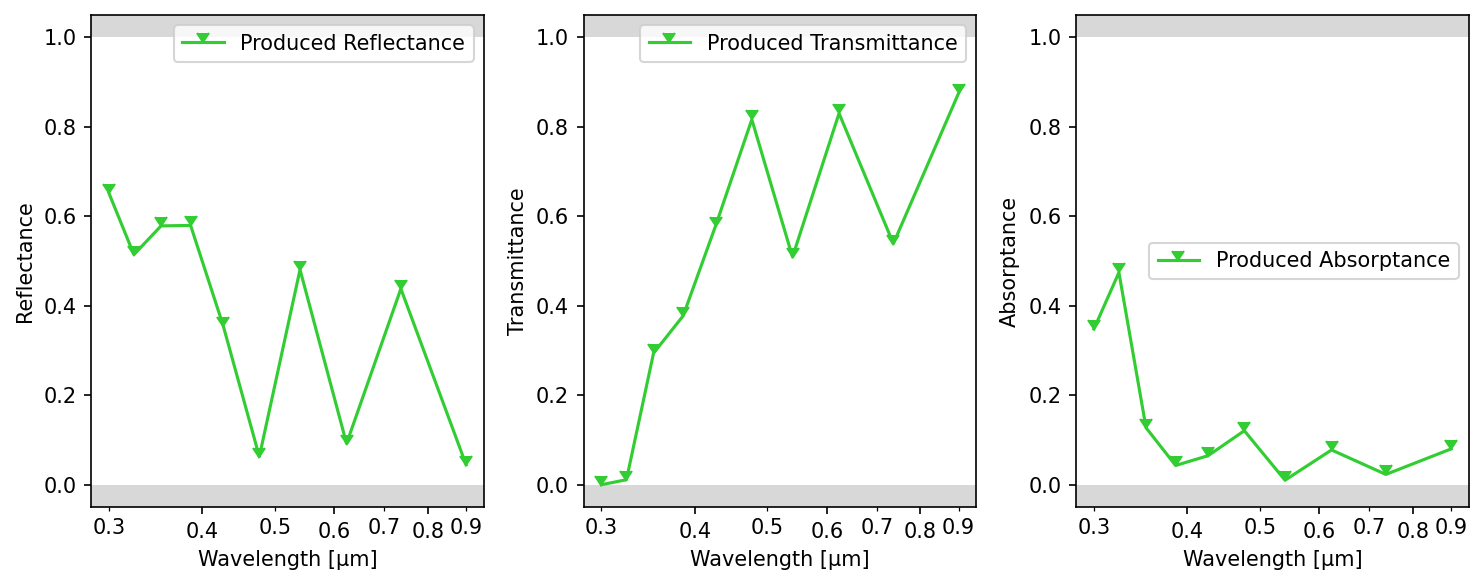

In [2]:
# Load default cfg as starting point
cfg = nidn.load_default_cfg()

# Specify your desired range of wavelengths
cfg.physical_wavelength_range[0] = 3e-7
cfg.physical_wavelength_range[1] = 9e-7
cfg.TRCWA_PER_LAYER_THICKNESS = [0.38]

# Let's investigate 50 frequency points
cfg.N_freq = 10
cfg.solver = "FDTD"
cfg.FDTD_niter = 450
cfg.N_layers = 1
cfg.FDTD_pulse_type = 'continuous'
cfg.FDTD_source_type = 'line'

# Currently, the target spectra is set manually as a list of numbers. Choose each 5th value to reduce from 100 frequency points to 20 frequency points
cfg.target_reflectance_spectrum = [0.04456351,0.07616634,0.12983103,0.20348341,0.20803709,0.28212550,0.34838794,0.35148116,0.40294107,0.43659179,0.43804083,0.45265764,0.42395525,0.42250250,0.35184451,0.34927237,0.23594347,0.22968049,0.10109031,0.09566545,0.09204569,0.04801336,0.04943829,0.15785883,0.16480385,0.33755576,0.34852490,0.35598405,0.47175452,0.47543828,0.48079059,0.47670861,0.47495085,0.47283219,0.33080953,0.31996884,0.30833286,0.29704388,0.07221731,0.06803254,0.06279853,0.25093825,0.27168874,0.29327866,0.31555886,0.52987157,0.53266849,0.53949557,0.54329768,0.54590920,0.35588414,0.34058632,0.30762652,0.27317067,0.16839377,0.20723618,0.25279078,0.27902083,0.33203165,0.38699248,0.57960660,0.56132624,0.54713063,0.50812035,0.47987271,0.40737469,0.31942957,0.41918578,0.46946234,0.55008628,0.57858655,0.60237008,0.22992761,0.32204145,0.38371327,0.44023784,0.49577304,0.49328186,0.46340183,0.45237985,0.51436802,0.52561688,0.53433126,0.54193417,0.55985565,0.56738637,0.57371749,0.57877213,0.65791848,0.65526587,0.65189846,0.64806130,0.64002900,0.63579534,0.63167151,0.62771639,0.62199316,0.66017008,0.65453985,0.64911847,][0::10]
cfg.target_transmittance_spectrum =[0.87536937,0.86225903,0.81306321,0.75287122,0.74871316,0.68198832,0.62422039,0.62128133,0.57431380,0.54036076,0.53893761,0.53746136,0.56318135,0.56430514,0.62822533,0.63025375,0.72190201,0.72902601,0.82516558,0.82823149,0.83023419,0.85988161,0.85803865,0.77452468,0.76844363,0.62843653,0.61871883,0.61209847,0.51762058,0.51417495,0.50911674,0.50285459,0.50413010,0.50572154,0.62959830,0.63739662,0.64559040,0.65416174,0.81584808,0.81671772,0.81649914,0.67631454,0.65980186,0.64488775,0.62678816,0.44563180,0.44270788,0.43865578,0.43446768,0.43148086,0.57915950,0.58924005,0.61020821,0.63242840,0.68207222,0.65677377,0.62419689,0.60660547,0.57197304,0.53173307,0.37738633,0.39192256,0.40217924,0.42987445,0.44531120,0.47829903,0.49511773,0.42511123,0.39097864,0.32282715,0.29403716,0.25334013,0.33381818,0.24619652,0.20109781,0.16036236,0.10121669,0.07910624,0.04449772,0.03074843,0.01117523,0.00339080,0.00167748,0.00077300,0.00015712,0.00006627,0.00003636,0.00001924,0.00000530,0.00000348,0.00000238,0.00000169,0.00000096,0.00000075,0.00000060,0.00000048,0.00000034,0.00000030,0.00000024,0.00000019,][0::10]

nidn.plot_spectrum(cfg,
                   cfg.target_reflectance_spectrum,
                   cfg.target_transmittance_spectrum)

physical_wls, normalized_freqs = nidn.get_frequency_points(cfg)
print("Physical wavelengths are (in meters):")
print(physical_wls)

In [3]:
cfg.pop("model",None); # Forget the old model

# Allowed range of epsilon values
cfg.real_min_eps = 0.00
cfg.real_max_eps = 20.0
cfg.imag_min_eps = 0.0
cfg.imag_max_eps = 6.0

cfg.type = "regression" # Choose type as described above

In [4]:
nidn.print_cfg(cfg)

name                   : example_name   |use_gpu                : 0              |seed                   : 100            |
model_type             : siren          |iterations             : 3000           |learning_rate          : 8e-05          |
type                   : regression     |reg_loss_weight        : 0.05           |use_regularization_loss: 1              |
L                      : 1.0            |absorption_loss        : 0              |n_neurons              : 100            |
hidden_layers          : 9              |encoding_dim           : 4              |siren_omega            : 1.0            |
add_noise              : 0              |noise_scale            : 0.001          |eps_oversampling       : 1              |
real_min_eps           : 0.0            |real_max_eps           : 20.0           |imag_min_eps           : 0.0            |
imag_max_eps           : 6.0            |solver                 : FDTD           |Nx                     : 1              |
Ny      

In [5]:
cfg.iterations = 250 # Set number of training iterations (that is forward model evaluations) to perform
nidn.run_training(cfg);

10:28:45|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.990 µm instead of the specified 1.0 µm
10:29:14|NIDN-INFO| ###  New Best=0.3408 with SpectrumLoss=0.3408 ### L1=0.3408
10:29:14|NIDN-INFO| It=0     Loss=0.3408   |  weighted_avg=0.3408  |  SpectrumLoss=0.3408 | L1=0.3408
10:29:42|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.990 µm instead of the specified 1.0 µm
10:30:13|NIDN-INFO| ###  New Best=0.3347 with SpectrumLoss=0.3347 ### L1=0.3347
10:30:40|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.990 µm instead of the specified 1.0 µm
10:31:10|NIDN-INFO| ###  New Best=0.3109 with SpectrumLoss=0.3109 ### L1=0.3109
10:31:38|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.990 µm instead of the specified 1.0 µm
10:32:37|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.990 µm instead of the specified 1.0 µm
10:33:10|NIDN-INFO| ###  New

11:04:40|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.990 µm instead of the specified 1.0 µm
11:05:14|NIDN-INFO| ###  New Best=0.2439 with SpectrumLoss=0.2439 ### L1=0.2439
11:05:47|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.990 µm instead of the specified 1.0 µm
11:06:17|NIDN-INFO| ###  New Best=0.2431 with SpectrumLoss=0.2431 ### L1=0.2431
11:06:47|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.990 µm instead of the specified 1.0 µm
11:07:36|NIDN-INFO| ###  New Best=0.2408 with SpectrumLoss=0.2408 ### L1=0.2408
11:08:07|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.990 µm instead of the specified 1.0 µm
11:08:43|NIDN-INFO| ###  New Best=0.2358 with SpectrumLoss=0.2358 ### L1=0.2358
11:08:43|NIDN-INFO| It=35    Loss=0.2358   |  weighted_avg=0.2480  |  SpectrumLoss=0.2358 | L1=0.2358
11:09:13|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1

11:40:04|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.990 µm instead of the specified 1.0 µm
11:40:39|NIDN-INFO| ###  New Best=0.1668 with SpectrumLoss=0.1668 ### L1=0.1668
11:41:18|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.990 µm instead of the specified 1.0 µm
11:41:51|NIDN-INFO| ###  New Best=0.1648 with SpectrumLoss=0.1648 ### L1=0.1648
11:42:26|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.990 µm instead of the specified 1.0 µm
11:43:01|NIDN-INFO| It=65    Loss=0.1650   |  weighted_avg=0.1810  |  SpectrumLoss=0.1650 | L1=0.1650
11:43:29|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.990 µm instead of the specified 1.0 µm
11:44:49|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.990 µm instead of the specified 1.0 µm
11:45:24|NIDN-INFO| ###  New Best=0.1625 with SpectrumLoss=0.1625 ### L1=0.1625
11:46:04|NIDN-WARNING| Due t

12:22:02|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.990 µm instead of the specified 1.0 µm
12:22:33|NIDN-INFO| It=100   Loss=0.1241   |  weighted_avg=0.1301  |  SpectrumLoss=0.1241 | L1=0.1241
12:23:06|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.990 µm instead of the specified 1.0 µm
12:24:05|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.990 µm instead of the specified 1.0 µm
12:25:06|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.990 µm instead of the specified 1.0 µm
12:26:11|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.990 µm instead of the specified 1.0 µm
12:27:13|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.990 µm instead of the specified 1.0 µm
12:27:43|NIDN-INFO| It=105   Loss=0.1225   |  weighted_avg=0.1237  |  SpectrumLoss=0.1225 | L1=0.1225
12:28:13|NIDN-WARNING| Due to the grid r

13:05:49|NIDN-INFO| It=140   Loss=0.1173   |  weighted_avg=0.1190  |  SpectrumLoss=0.1173 | L1=0.1173
13:06:17|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.990 µm instead of the specified 1.0 µm
13:07:20|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.990 µm instead of the specified 1.0 µm
13:08:24|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.990 µm instead of the specified 1.0 µm
13:09:29|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.990 µm instead of the specified 1.0 µm
13:10:28|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.990 µm instead of the specified 1.0 µm
13:11:02|NIDN-INFO| It=145   Loss=0.1177   |  weighted_avg=0.1186  |  SpectrumLoss=0.1177 | L1=0.1177
13:11:32|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.990 µm instead of the specified 1.0 µm
13:12:06|NIDN-INFO| ###  New Best=0.1162

13:54:03|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.990 µm instead of the specified 1.0 µm
13:55:07|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.990 µm instead of the specified 1.0 µm
13:55:39|NIDN-INFO| It=185   Loss=0.1167   |  weighted_avg=0.1170  |  SpectrumLoss=0.1167 | L1=0.1167
13:56:09|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.990 µm instead of the specified 1.0 µm
13:57:15|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.990 µm instead of the specified 1.0 µm
13:58:24|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.990 µm instead of the specified 1.0 µm
13:59:26|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.990 µm instead of the specified 1.0 µm
14:00:28|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.990 µm instead of the specified 1.0 µm
14:01:02|NIDN-IN

14:41:17|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.990 µm instead of the specified 1.0 µm
14:41:48|NIDN-INFO| It=225   Loss=0.1137   |  weighted_avg=0.1143  |  SpectrumLoss=0.1137 | L1=0.1137
14:42:18|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.990 µm instead of the specified 1.0 µm
14:43:25|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.990 µm instead of the specified 1.0 µm
14:44:29|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.990 µm instead of the specified 1.0 µm
14:45:36|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.990 µm instead of the specified 1.0 µm
14:46:51|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.990 µm instead of the specified 1.0 µm
14:47:37|NIDN-INFO| It=230   Loss=0.1132   |  weighted_avg=0.1140  |  SpectrumLoss=0.1132 | L1=0.1132
14:48:08|NIDN-WARNING| Due to the grid r

15:14:54|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.990 µm instead of the specified 1.0 µm


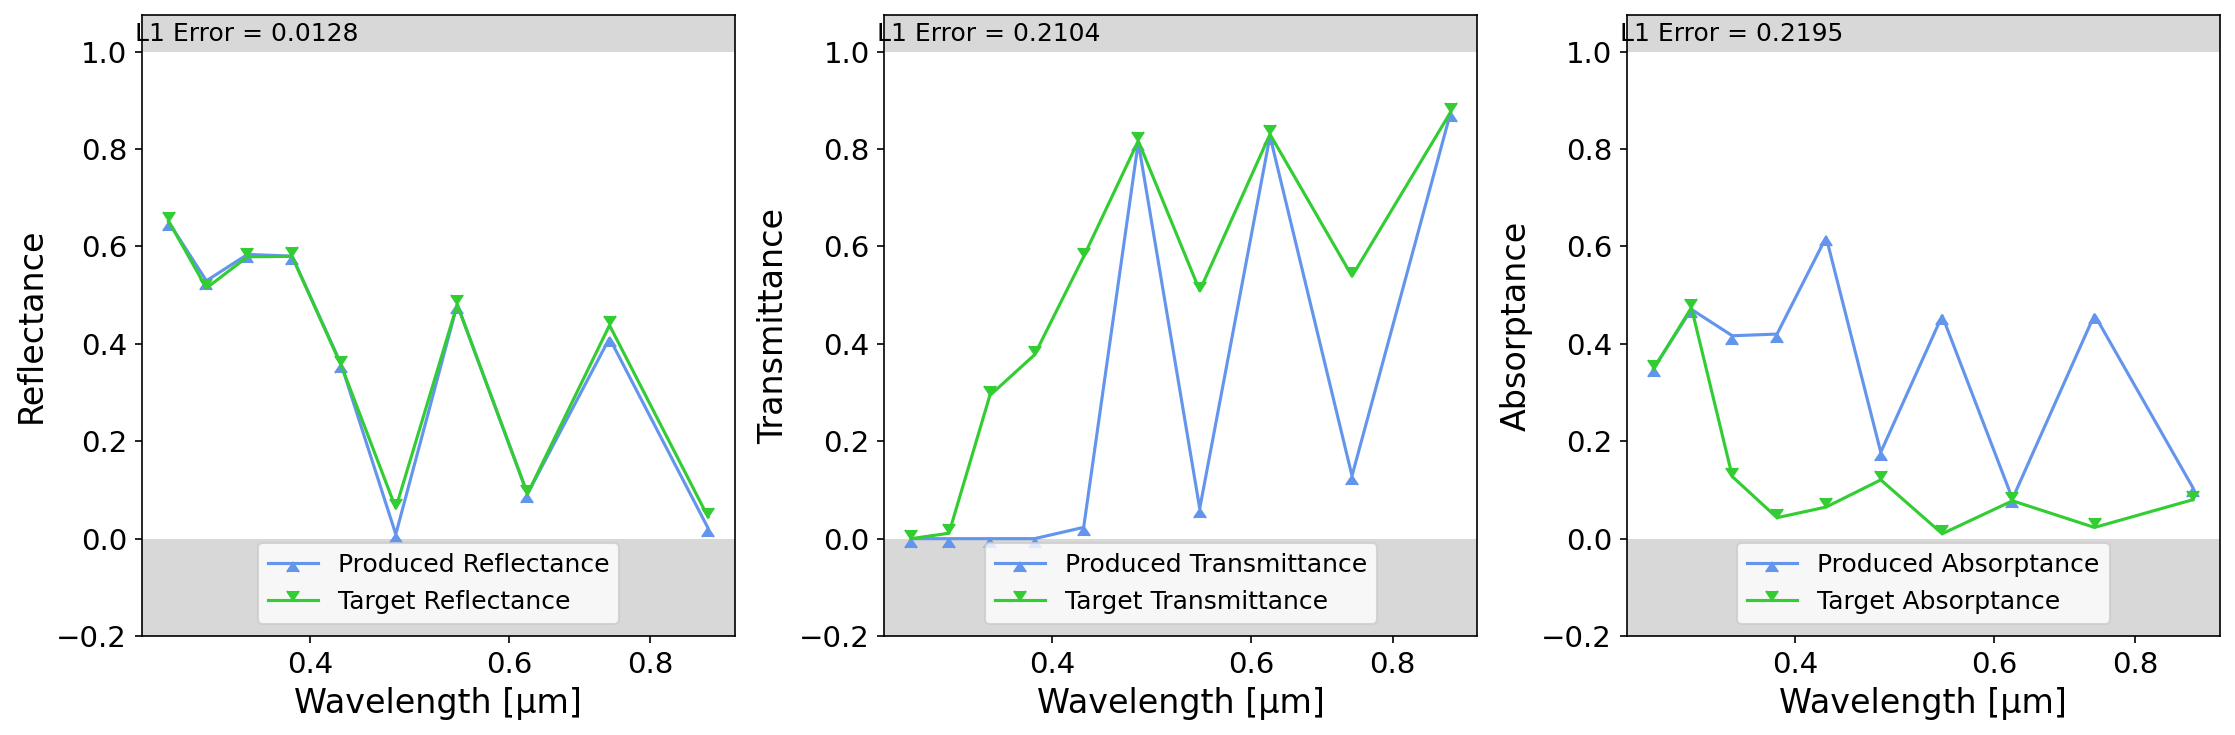

In [6]:
nidn.plot_spectra(cfg)

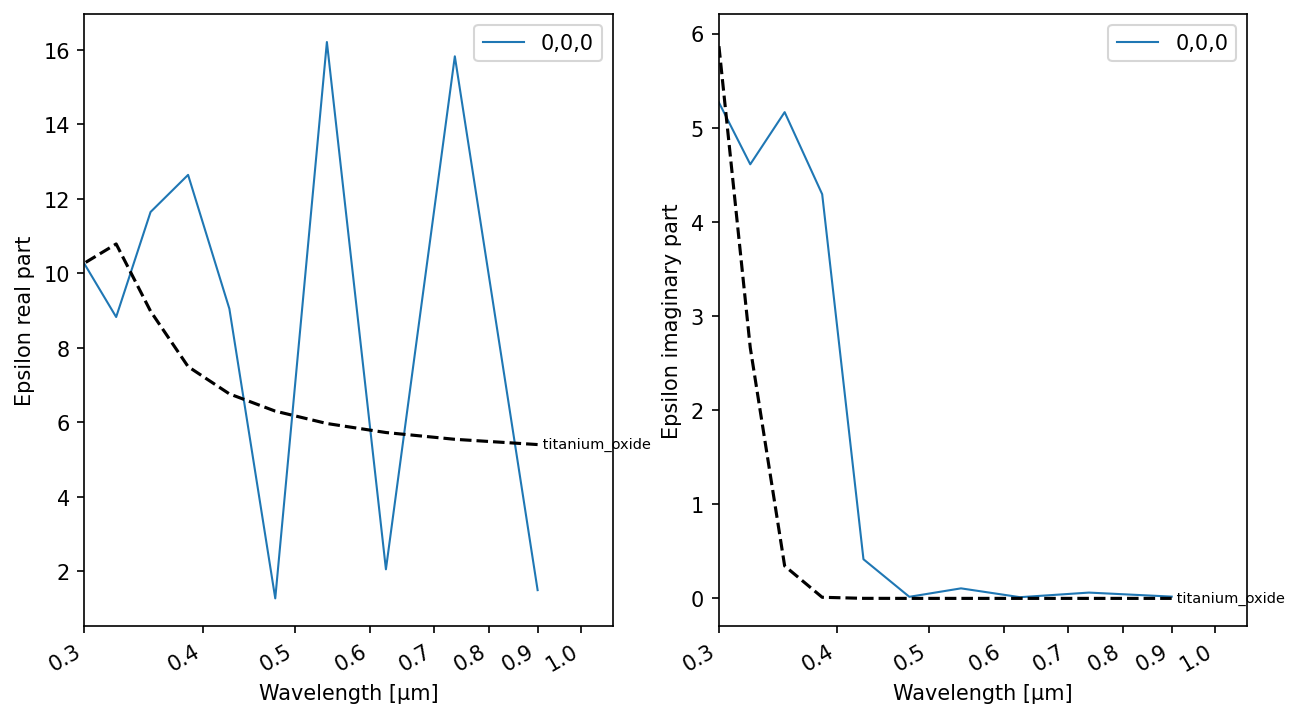

In [7]:
nidn.plot_eps_per_point(cfg,compare_to_material="titanium_oxide")

# Single layer , uniform, classification

In [8]:
cfg.pop("model",None); # Forget the old model

# Allowed range of epsilon values
cfg.real_min_eps = 0.0
cfg.real_max_eps = 20.0
cfg.imag_min_eps = 0.0
cfg.imag_max_eps = 6.0

cfg.type = "classification" # Choose type as described above
cfg.iterations = 100 # Set number of training iterations (that is forward model evaluations) to perform

In [9]:
nidn.run_training(cfg);

15:40:18|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.990 µm instead of the specified 1.0 µm
15:40:53|NIDN-INFO| ###  New Best=0.3169 with SpectrumLoss=0.3119 ### L1=0.3119
15:40:53|NIDN-INFO| It=0     Loss=0.3169   |  weighted_avg=0.3169  |  SpectrumLoss=0.3119 | L1=0.3119
15:41:22|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.990 µm instead of the specified 1.0 µm
15:41:56|NIDN-INFO| ###  New Best=0.2988 with SpectrumLoss=0.2938 ### L1=0.2938
15:42:26|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.990 µm instead of the specified 1.0 µm
15:42:59|NIDN-INFO| ###  New Best=0.2512 with SpectrumLoss=0.2462 ### L1=0.2462
15:43:29|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.990 µm instead of the specified 1.0 µm
15:44:02|NIDN-INFO| ###  New Best=0.2492 with SpectrumLoss=0.2462 ### L1=0.2462
15:44:34|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1

16:15:20|NIDN-INFO| ###  New Best=0.1374 with SpectrumLoss=0.1368 ### L1=0.1368
16:15:54|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.990 µm instead of the specified 1.0 µm
16:16:33|NIDN-INFO| It=30    Loss=0.1378   |  weighted_avg=0.1454  |  SpectrumLoss=0.1372 | L1=0.1372
16:17:06|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.990 µm instead of the specified 1.0 µm
16:17:56|NIDN-INFO| ###  New Best=0.1374 with SpectrumLoss=0.1368 ### L1=0.1368
16:18:31|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.990 µm instead of the specified 1.0 µm
16:19:21|NIDN-INFO| ###  New Best=0.1373 with SpectrumLoss=0.1367 ### L1=0.1367
16:20:03|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.990 µm instead of the specified 1.0 µm
16:21:10|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.990 µm instead of the specified 1.0 µm
16:22:17|NIDN-INFO| ###  New

17:01:37|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.990 µm instead of the specified 1.0 µm
17:02:53|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.990 µm instead of the specified 1.0 µm
17:03:30|NIDN-INFO| It=70    Loss=0.1364   |  weighted_avg=0.1366  |  SpectrumLoss=0.1359 | L1=0.1359
17:04:01|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.990 µm instead of the specified 1.0 µm
17:05:10|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.990 µm instead of the specified 1.0 µm
17:06:13|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.990 µm instead of the specified 1.0 µm
17:07:15|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.990 µm instead of the specified 1.0 µm
17:08:20|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.990 µm instead of the specified 1.0 µm
17:08:58|NIDN-IN

17:36:29|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.990 µm instead of the specified 1.0 µm


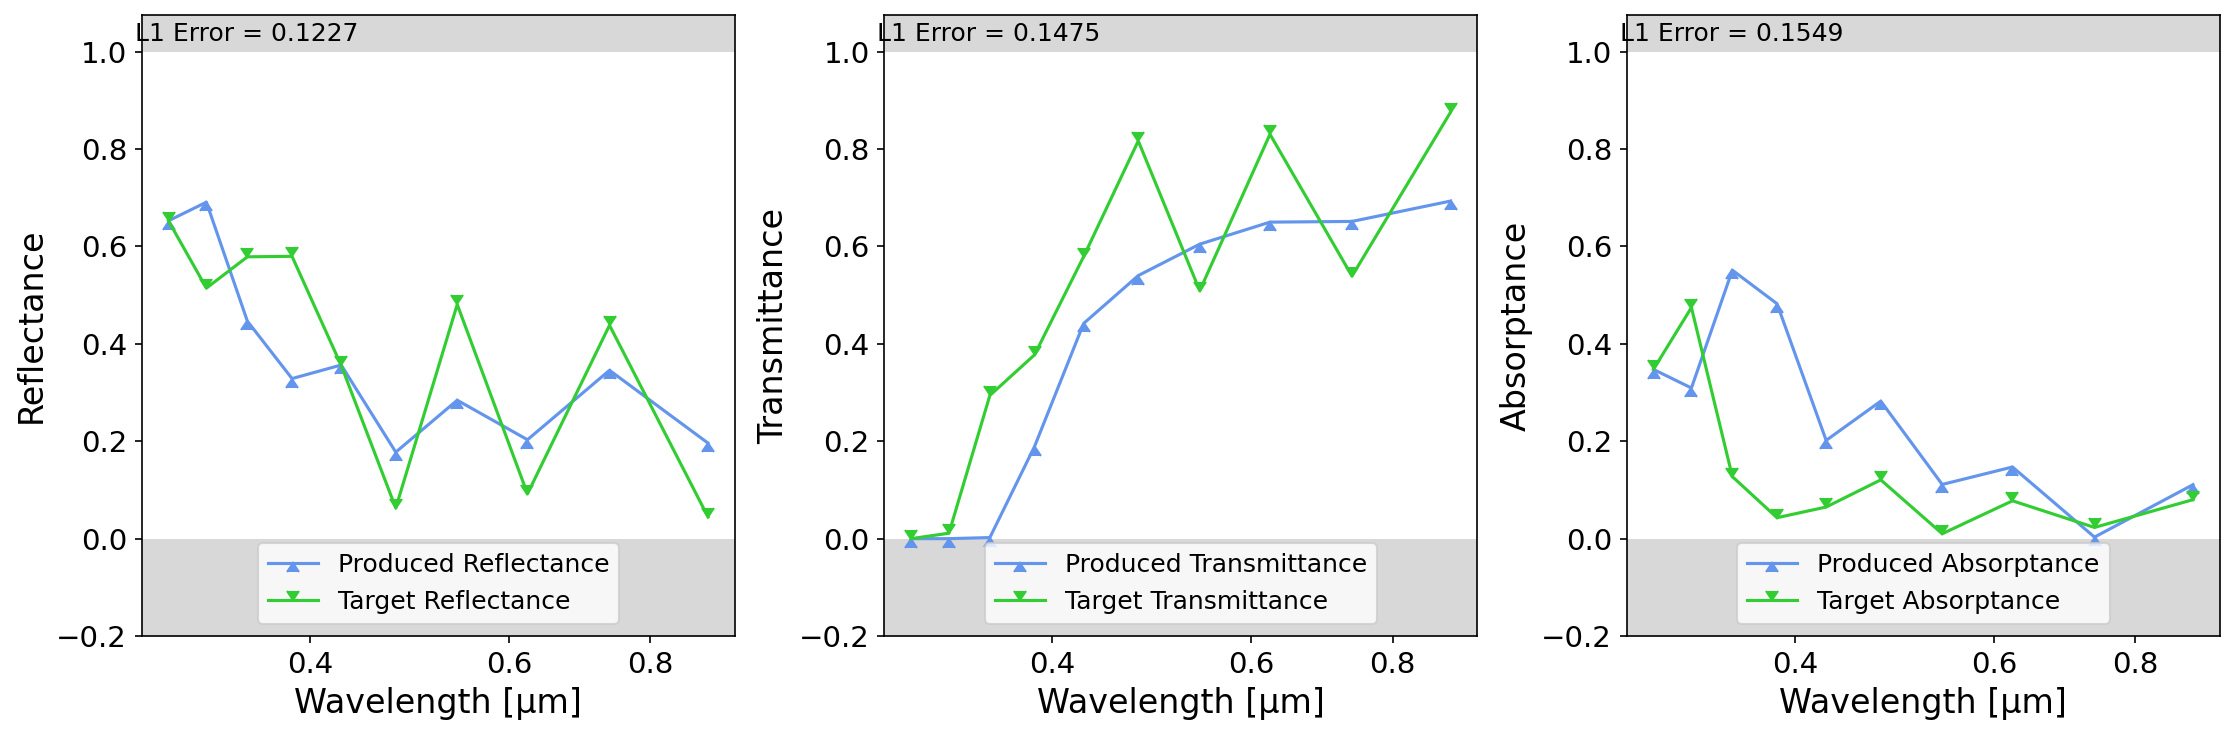

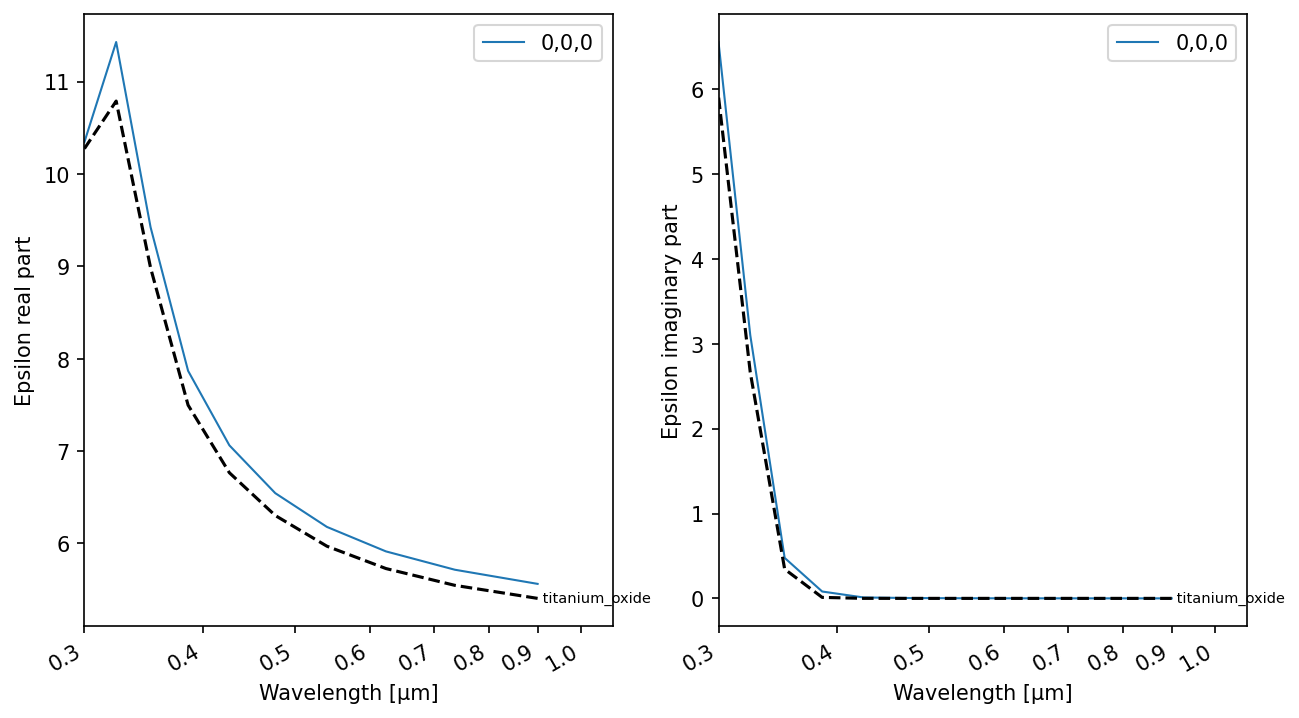

In [10]:
nidn.plot_spectra(cfg)
nidn.plot_eps_per_point(cfg)

## Uniform Three-Layer Ground Truth 

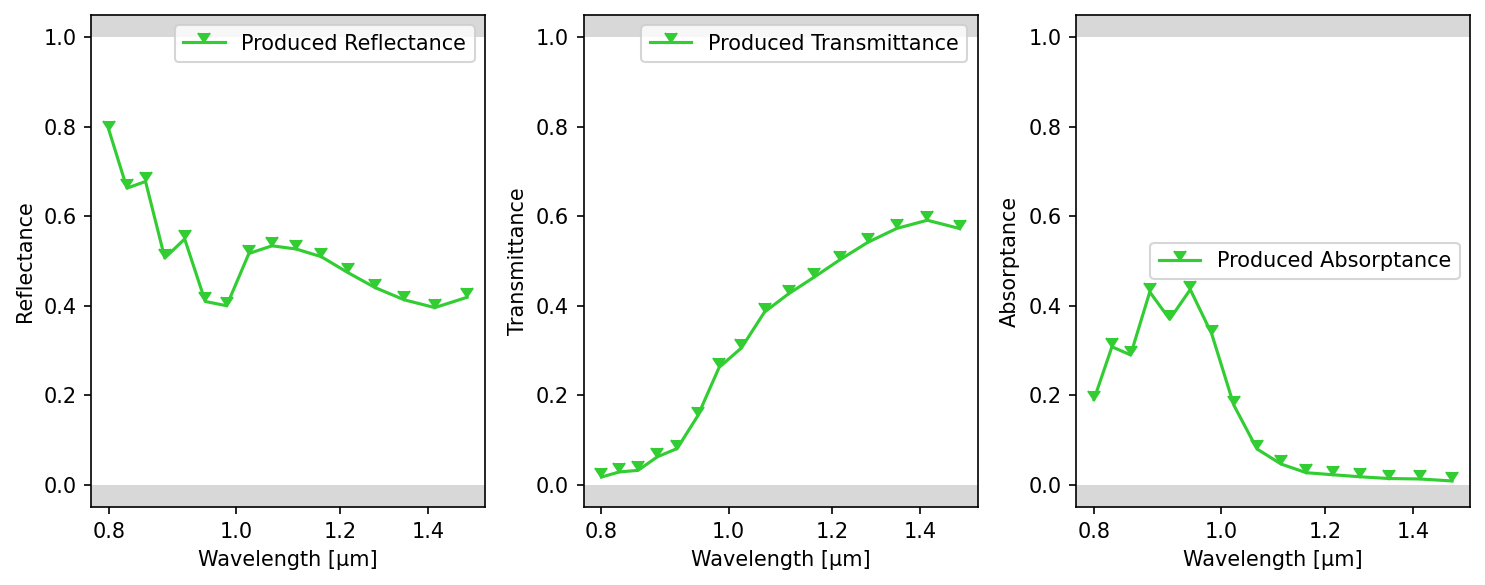

In [2]:
# Load default cfg as starting point
cfg = nidn.load_default_cfg()

# Set grid specifics
cfg.Nx = 1
cfg.Ny = 1
cfg.N_layers = 3
cfg.N_freq = 16
cfg.PER_LAYER_THICKNESS = [0.1]
cfg.FDTD_pulse_type = 'continuous'
cfg.FDTD_source_type = 'line'

# Specify your desired range of wavelengths
cfg.physical_wavelength_range[0] = 8e-7 
cfg.physical_wavelength_range[1] = 1.5e-6

cfg.target_reflectance_spectrum = [0.41897427,0.39591158,0.41332836,0.44050670,0.47452302,0.50973356,0.52690292,0.53404939,0.51684631,0.40007779,0.40960854,0.54935004,0.50675232,0.67787965,0.66292254,0.79244483,]
cfg.target_transmittance_spectrum = [0.57266058,0.59123892,0.57286972,0.54174457,0.50317150,0.46341936,0.42688453,0.38601254,0.30563326,0.26237625,0.15404439,0.08091528,0.06232964,0.03206342,0.02864806,0.01709644,]

cfg.FDTD_niter = 500
cfg.solver ="FDTD"

nidn.plot_spectrum(cfg,
                   cfg.target_reflectance_spectrum,
                   cfg.target_transmittance_spectrum)

In [3]:
# Allowed range of epsilon values
cfg.pop("model",None); # Forget the old model
cfg.real_min_eps = 0.1
cfg.real_max_eps = 20.0
cfg.imag_min_eps = 0.0
cfg.imag_max_eps = 20.0

cfg.type = "regression" # Choose type as described above (for now still regression)
cfg.iterations = 100 # Set number of training iterations (that is forward model evaluations) to perform

In [4]:
nidn.run_training(cfg);

23:11:08|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.080 µm instead of the specified 0.1 µm
23:12:05|NIDN-INFO| ###  New Best=0.2211 with SpectrumLoss=0.2211 ### L1=0.2211
23:12:05|NIDN-INFO| It=0     Loss=0.2211   |  weighted_avg=0.2211  |  SpectrumLoss=0.2211 | L1=0.2211
23:12:57|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.080 µm instead of the specified 0.1 µm
23:12:57|NIDN-WARNING| Due to the grid resultion, the thickness of layer 2 is set to 0.080 µm instead of the specified 0.1 µm
23:12:57|NIDN-WARNING| Due to the grid resultion, the thickness of layer 3 is set to 0.080 µm instead of the specified 0.1 µm
23:13:54|NIDN-INFO| ###  New Best=0.1942 with SpectrumLoss=0.1942 ### L1=0.1942
23:14:47|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.080 µm instead of the specified 0.1 µm
23:14:47|NIDN-WARNING| Due to the grid resultion, the thickness of layer 2 is set to 0.080 µm instead of the

23:36:27|NIDN-WARNING| Due to the grid resultion, the thickness of layer 2 is set to 0.080 µm instead of the specified 0.1 µm
23:36:27|NIDN-WARNING| Due to the grid resultion, the thickness of layer 3 is set to 0.080 µm instead of the specified 0.1 µm
23:37:20|NIDN-INFO| ###  New Best=0.1593 with SpectrumLoss=0.1593 ### L1=0.1593
23:38:08|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.080 µm instead of the specified 0.1 µm
23:38:08|NIDN-WARNING| Due to the grid resultion, the thickness of layer 2 is set to 0.080 µm instead of the specified 0.1 µm
23:38:08|NIDN-WARNING| Due to the grid resultion, the thickness of layer 3 is set to 0.080 µm instead of the specified 0.1 µm
23:38:59|NIDN-INFO| It=15    Loss=0.1594   |  weighted_avg=0.1733  |  SpectrumLoss=0.1594 | L1=0.1594
23:39:53|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.080 µm instead of the specified 0.1 µm
23:39:53|NIDN-WARNING| Due to the grid resultion, the thicknes

00:04:05|NIDN-WARNING| Due to the grid resultion, the thickness of layer 2 is set to 0.080 µm instead of the specified 0.1 µm
00:04:05|NIDN-WARNING| Due to the grid resultion, the thickness of layer 3 is set to 0.080 µm instead of the specified 0.1 µm
00:05:28|NIDN-INFO| ###  New Best=0.1491 with SpectrumLoss=0.1491 ### L1=0.1491
00:06:29|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.080 µm instead of the specified 0.1 µm
00:06:29|NIDN-WARNING| Due to the grid resultion, the thickness of layer 2 is set to 0.080 µm instead of the specified 0.1 µm
00:06:29|NIDN-WARNING| Due to the grid resultion, the thickness of layer 3 is set to 0.080 µm instead of the specified 0.1 µm
00:07:27|NIDN-INFO| ###  New Best=0.1469 with SpectrumLoss=0.1469 ### L1=0.1469
00:07:28|NIDN-INFO| It=30    Loss=0.1469   |  weighted_avg=0.1554  |  SpectrumLoss=0.1469 | L1=0.1469
00:08:16|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.080 µm instead of the

00:30:18|NIDN-WARNING| Due to the grid resultion, the thickness of layer 2 is set to 0.080 µm instead of the specified 0.1 µm
00:30:18|NIDN-WARNING| Due to the grid resultion, the thickness of layer 3 is set to 0.080 µm instead of the specified 0.1 µm
00:31:12|NIDN-INFO| ###  New Best=0.1322 with SpectrumLoss=0.1322 ### L1=0.1322
00:32:00|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.080 µm instead of the specified 0.1 µm
00:32:00|NIDN-WARNING| Due to the grid resultion, the thickness of layer 2 is set to 0.080 µm instead of the specified 0.1 µm
00:32:00|NIDN-WARNING| Due to the grid resultion, the thickness of layer 3 is set to 0.080 µm instead of the specified 0.1 µm
00:32:53|NIDN-INFO| ###  New Best=0.1308 with SpectrumLoss=0.1308 ### L1=0.1308
00:33:43|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.080 µm instead of the specified 0.1 µm
00:33:43|NIDN-WARNING| Due to the grid resultion, the thickness of layer 2 is set to

00:57:21|NIDN-WARNING| Due to the grid resultion, the thickness of layer 3 is set to 0.080 µm instead of the specified 0.1 µm
00:59:03|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.080 µm instead of the specified 0.1 µm
00:59:03|NIDN-WARNING| Due to the grid resultion, the thickness of layer 2 is set to 0.080 µm instead of the specified 0.1 µm
00:59:03|NIDN-WARNING| Due to the grid resultion, the thickness of layer 3 is set to 0.080 µm instead of the specified 0.1 µm
01:01:05|NIDN-INFO| ###  New Best=0.1193 with SpectrumLoss=0.1193 ### L1=0.1193
01:01:53|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.080 µm instead of the specified 0.1 µm
01:01:53|NIDN-WARNING| Due to the grid resultion, the thickness of layer 2 is set to 0.080 µm instead of the specified 0.1 µm
01:01:53|NIDN-WARNING| Due to the grid resultion, the thickness of layer 3 is set to 0.080 µm instead of the specified 0.1 µm
01:03:22|NIDN-INFO| ###  New Best=0.11

01:27:49|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.080 µm instead of the specified 0.1 µm
01:27:49|NIDN-WARNING| Due to the grid resultion, the thickness of layer 2 is set to 0.080 µm instead of the specified 0.1 µm
01:27:50|NIDN-WARNING| Due to the grid resultion, the thickness of layer 3 is set to 0.080 µm instead of the specified 0.1 µm
01:29:31|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.080 µm instead of the specified 0.1 µm
01:29:31|NIDN-WARNING| Due to the grid resultion, the thickness of layer 2 is set to 0.080 µm instead of the specified 0.1 µm
01:29:31|NIDN-WARNING| Due to the grid resultion, the thickness of layer 3 is set to 0.080 µm instead of the specified 0.1 µm
01:31:11|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.080 µm instead of the specified 0.1 µm
01:31:11|NIDN-WARNING| Due to the grid resultion, the thickness of layer 2 is set to 0.080 µm instead of the specified

01:56:05|NIDN-WARNING| Due to the grid resultion, the thickness of layer 2 is set to 0.080 µm instead of the specified 0.1 µm
01:56:05|NIDN-WARNING| Due to the grid resultion, the thickness of layer 3 is set to 0.080 µm instead of the specified 0.1 µm
01:59:02|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.080 µm instead of the specified 0.1 µm
01:59:02|NIDN-WARNING| Due to the grid resultion, the thickness of layer 2 is set to 0.080 µm instead of the specified 0.1 µm
01:59:02|NIDN-WARNING| Due to the grid resultion, the thickness of layer 3 is set to 0.080 µm instead of the specified 0.1 µm
01:59:56|NIDN-INFO| ###  New Best=0.1033 with SpectrumLoss=0.1033 ### L1=0.1033
02:00:50|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.080 µm instead of the specified 0.1 µm
02:00:50|NIDN-WARNING| Due to the grid resultion, the thickness of layer 2 is set to 0.080 µm instead of the specified 0.1 µm
02:00:50|NIDN-WARNING| Due to the grid

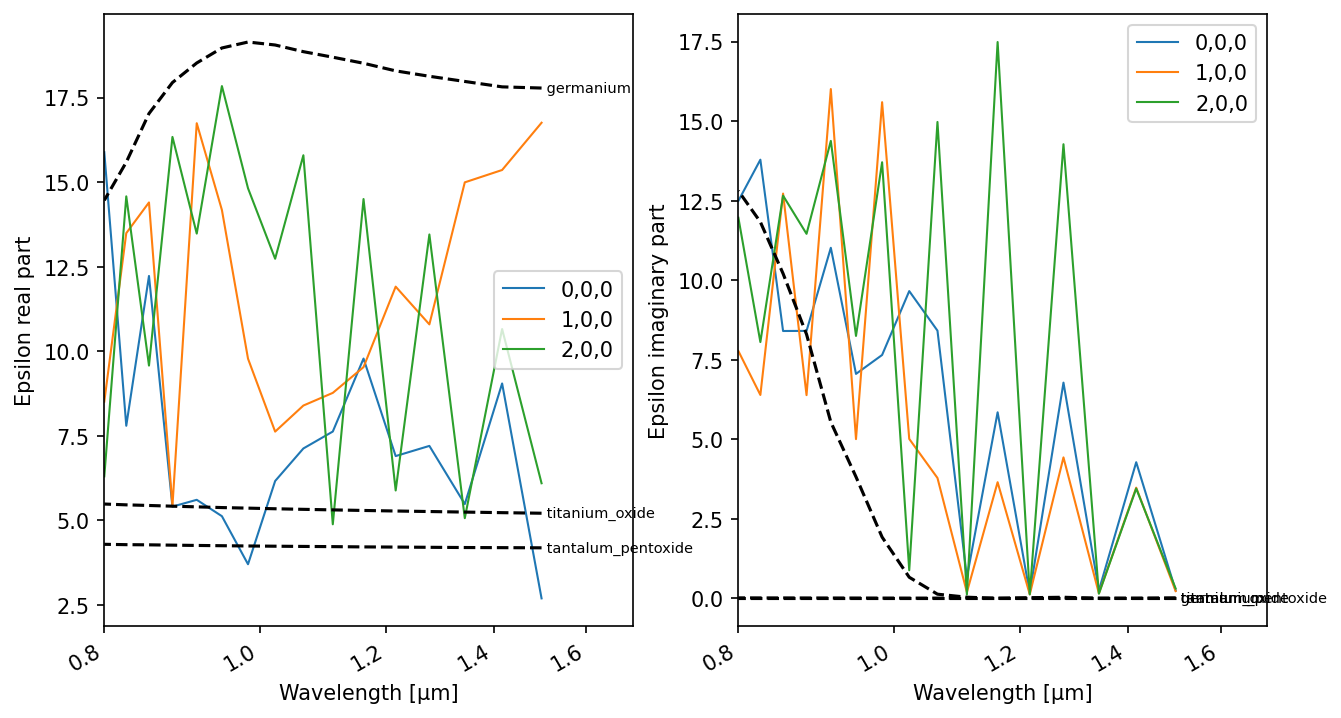

In [5]:
nidn.plot_eps_per_point(cfg,compare_to_material=["titanium_oxide","germanium","tantalum_pentoxide"])

02:21:53|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.080 µm instead of the specified 0.1 µm
02:21:53|NIDN-WARNING| Due to the grid resultion, the thickness of layer 2 is set to 0.080 µm instead of the specified 0.1 µm
02:21:53|NIDN-WARNING| Due to the grid resultion, the thickness of layer 3 is set to 0.080 µm instead of the specified 0.1 µm


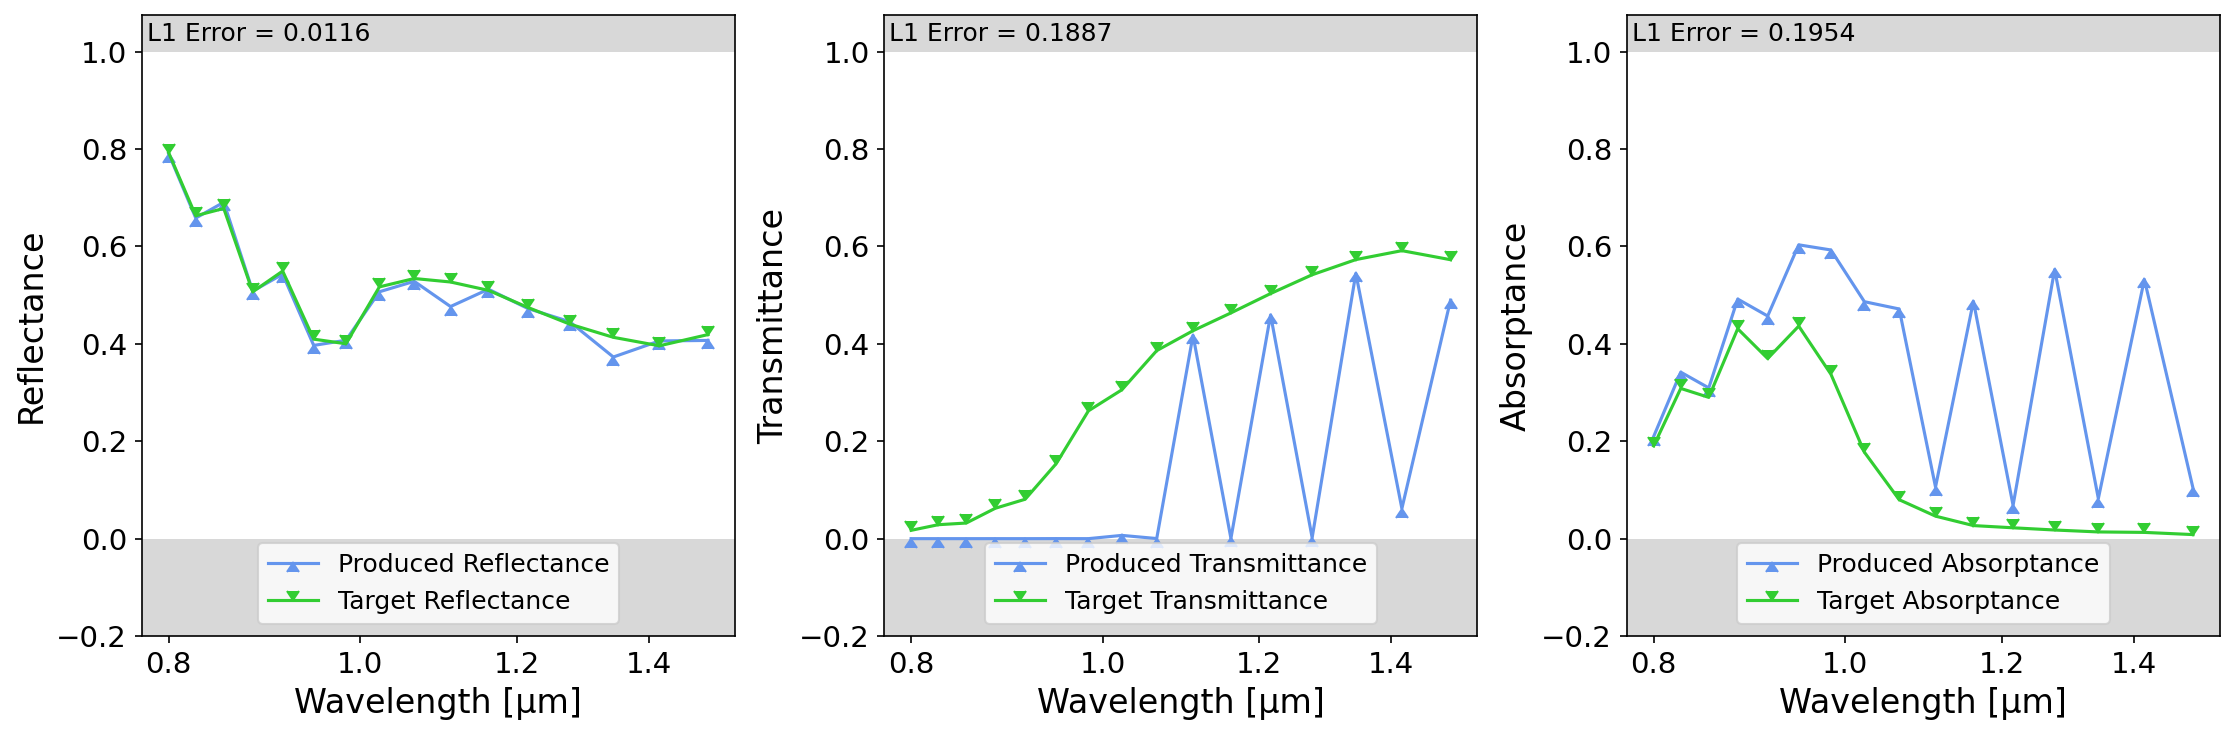

In [6]:
# The other plots
nidn.plot_spectra(cfg)

In [7]:
# Allowed range of epsilon values
cfg.pop("model",None); # Forget the old model

cfg.type = "classification" # Choose type as described above (for now still regression)
cfg.iterations = 100 # Set number of training iterations (that is forward model evaluations) to perform

In [8]:
nidn.run_training(cfg);

02:23:33|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.080 µm instead of the specified 0.1 µm
02:23:33|NIDN-WARNING| Due to the grid resultion, the thickness of layer 2 is set to 0.080 µm instead of the specified 0.1 µm
02:23:33|NIDN-WARNING| Due to the grid resultion, the thickness of layer 3 is set to 0.080 µm instead of the specified 0.1 µm
02:24:33|NIDN-INFO| ###  New Best=0.1448 with SpectrumLoss=0.1404 ### L1=0.1404
02:24:33|NIDN-INFO| It=0     Loss=0.1448   |  weighted_avg=0.1448  |  SpectrumLoss=0.1404 | L1=0.1404
02:25:21|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.080 µm instead of the specified 0.1 µm
02:25:21|NIDN-WARNING| Due to the grid resultion, the thickness of layer 2 is set to 0.080 µm instead of the specified 0.1 µm
02:25:21|NIDN-WARNING| Due to the grid resultion, the thickness of layer 3 is set to 0.080 µm instead of the specified 0.1 µm
02:26:18|NIDN-INFO| ###  New Best=0.0950 with SpectrumLoss=0.0

02:47:51|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.080 µm instead of the specified 0.1 µm
02:47:51|NIDN-WARNING| Due to the grid resultion, the thickness of layer 2 is set to 0.080 µm instead of the specified 0.1 µm
02:47:51|NIDN-WARNING| Due to the grid resultion, the thickness of layer 3 is set to 0.080 µm instead of the specified 0.1 µm
02:49:10|NIDN-INFO| ###  New Best=0.0485 with SpectrumLoss=0.0443 ### L1=0.0443
02:50:05|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.080 µm instead of the specified 0.1 µm
02:50:05|NIDN-WARNING| Due to the grid resultion, the thickness of layer 2 is set to 0.080 µm instead of the specified 0.1 µm
02:50:05|NIDN-WARNING| Due to the grid resultion, the thickness of layer 3 is set to 0.080 µm instead of the specified 0.1 µm
02:50:55|NIDN-INFO| It=15    Loss=0.0486   |  weighted_avg=0.0717  |  SpectrumLoss=0.0446 | L1=0.0446
02:51:41|NIDN-WARNING| Due to the grid resultion, the thicknes

03:16:37|NIDN-WARNING| Due to the grid resultion, the thickness of layer 3 is set to 0.080 µm instead of the specified 0.1 µm
03:18:21|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.080 µm instead of the specified 0.1 µm
03:18:21|NIDN-WARNING| Due to the grid resultion, the thickness of layer 2 is set to 0.080 µm instead of the specified 0.1 µm
03:18:21|NIDN-WARNING| Due to the grid resultion, the thickness of layer 3 is set to 0.080 µm instead of the specified 0.1 µm
03:19:13|NIDN-INFO| It=30    Loss=0.0431   |  weighted_avg=0.0465  |  SpectrumLoss=0.0395 | L1=0.0395
03:20:01|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.080 µm instead of the specified 0.1 µm
03:20:01|NIDN-WARNING| Due to the grid resultion, the thickness of layer 2 is set to 0.080 µm instead of the specified 0.1 µm
03:20:01|NIDN-WARNING| Due to the grid resultion, the thickness of layer 3 is set to 0.080 µm instead of the specified 0.1 µm
03:21:41|NIDN-WA

03:45:20|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.080 µm instead of the specified 0.1 µm
03:45:20|NIDN-WARNING| Due to the grid resultion, the thickness of layer 2 is set to 0.080 µm instead of the specified 0.1 µm
03:45:20|NIDN-WARNING| Due to the grid resultion, the thickness of layer 3 is set to 0.080 µm instead of the specified 0.1 µm
03:46:56|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.080 µm instead of the specified 0.1 µm
03:46:56|NIDN-WARNING| Due to the grid resultion, the thickness of layer 2 is set to 0.080 µm instead of the specified 0.1 µm
03:46:56|NIDN-WARNING| Due to the grid resultion, the thickness of layer 3 is set to 0.080 µm instead of the specified 0.1 µm
03:48:51|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.080 µm instead of the specified 0.1 µm
03:48:51|NIDN-WARNING| Due to the grid resultion, the thickness of layer 2 is set to 0.080 µm instead of the specified

04:13:25|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.080 µm instead of the specified 0.1 µm
04:13:25|NIDN-WARNING| Due to the grid resultion, the thickness of layer 2 is set to 0.080 µm instead of the specified 0.1 µm
04:13:25|NIDN-WARNING| Due to the grid resultion, the thickness of layer 3 is set to 0.080 µm instead of the specified 0.1 µm
04:14:19|NIDN-INFO| ###  New Best=0.0409 with SpectrumLoss=0.0374 ### L1=0.0374
04:15:17|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.080 µm instead of the specified 0.1 µm
04:15:17|NIDN-WARNING| Due to the grid resultion, the thickness of layer 2 is set to 0.080 µm instead of the specified 0.1 µm
04:15:17|NIDN-WARNING| Due to the grid resultion, the thickness of layer 3 is set to 0.080 µm instead of the specified 0.1 µm
04:16:54|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.080 µm instead of the specified 0.1 µm
04:16:54|NIDN-WARNING| Due to the grid

04:40:34|NIDN-WARNING| Due to the grid resultion, the thickness of layer 3 is set to 0.080 µm instead of the specified 0.1 µm
04:42:15|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.080 µm instead of the specified 0.1 µm
04:42:15|NIDN-WARNING| Due to the grid resultion, the thickness of layer 2 is set to 0.080 µm instead of the specified 0.1 µm
04:42:15|NIDN-WARNING| Due to the grid resultion, the thickness of layer 3 is set to 0.080 µm instead of the specified 0.1 µm
04:43:55|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.080 µm instead of the specified 0.1 µm
04:43:55|NIDN-WARNING| Due to the grid resultion, the thickness of layer 2 is set to 0.080 µm instead of the specified 0.1 µm
04:43:55|NIDN-WARNING| Due to the grid resultion, the thickness of layer 3 is set to 0.080 µm instead of the specified 0.1 µm
04:44:46|NIDN-INFO| It=80    Loss=0.0412   |  weighted_avg=0.0416  |  SpectrumLoss=0.0378 | L1=0.0378
04:45:34|NIDN-WA

05:11:36|NIDN-WARNING| Due to the grid resultion, the thickness of layer 3 is set to 0.080 µm instead of the specified 0.1 µm
05:13:16|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.080 µm instead of the specified 0.1 µm
05:13:16|NIDN-WARNING| Due to the grid resultion, the thickness of layer 2 is set to 0.080 µm instead of the specified 0.1 µm
05:13:16|NIDN-WARNING| Due to the grid resultion, the thickness of layer 3 is set to 0.080 µm instead of the specified 0.1 µm
05:14:09|NIDN-INFO| It=95    Loss=0.0406   |  weighted_avg=0.0411  |  SpectrumLoss=0.0371 | L1=0.0371
05:15:04|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.080 µm instead of the specified 0.1 µm
05:15:04|NIDN-WARNING| Due to the grid resultion, the thickness of layer 2 is set to 0.080 µm instead of the specified 0.1 µm
05:15:04|NIDN-WARNING| Due to the grid resultion, the thickness of layer 3 is set to 0.080 µm instead of the specified 0.1 µm
05:16:06|NIDN-IN

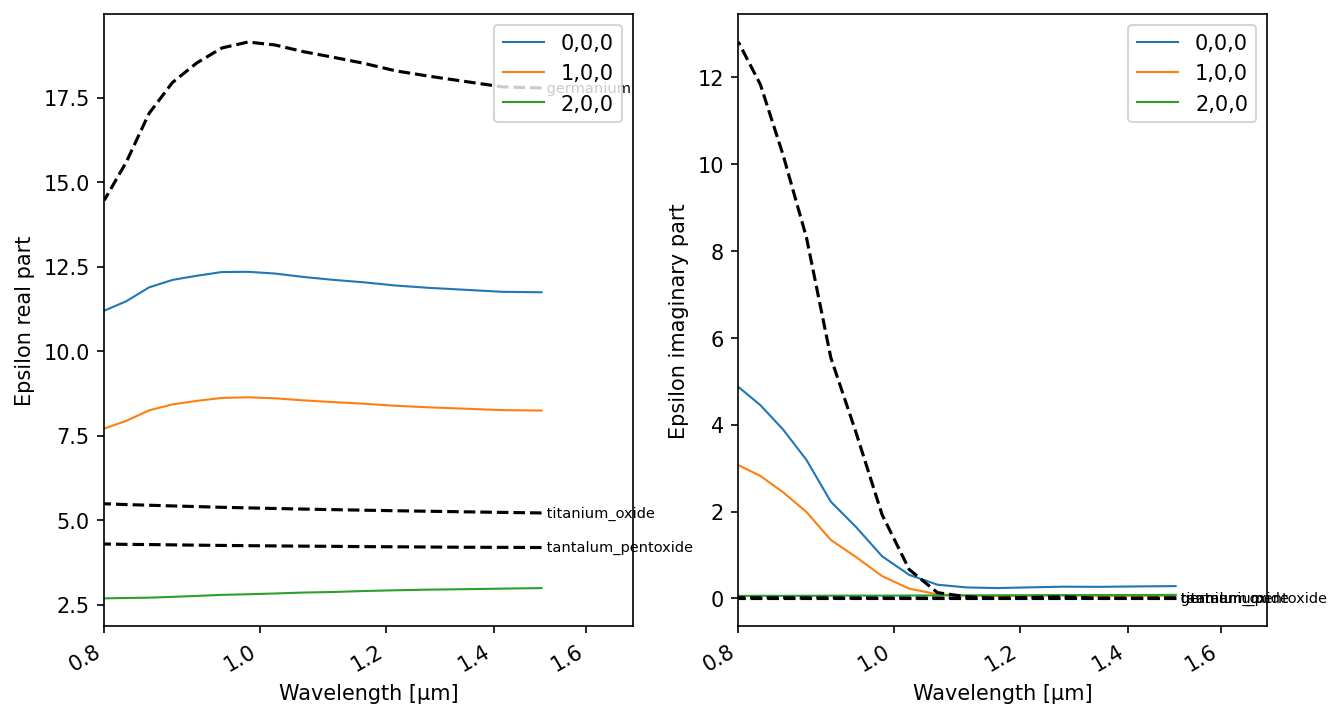

In [9]:
nidn.plot_eps_per_point(cfg,compare_to_material=["titanium_oxide","germanium","tantalum_pentoxide"])

05:24:08|NIDN-WARNING| Due to the grid resultion, the thickness of layer 1 is set to 0.080 µm instead of the specified 0.1 µm
05:24:08|NIDN-WARNING| Due to the grid resultion, the thickness of layer 2 is set to 0.080 µm instead of the specified 0.1 µm
05:24:08|NIDN-WARNING| Due to the grid resultion, the thickness of layer 3 is set to 0.080 µm instead of the specified 0.1 µm


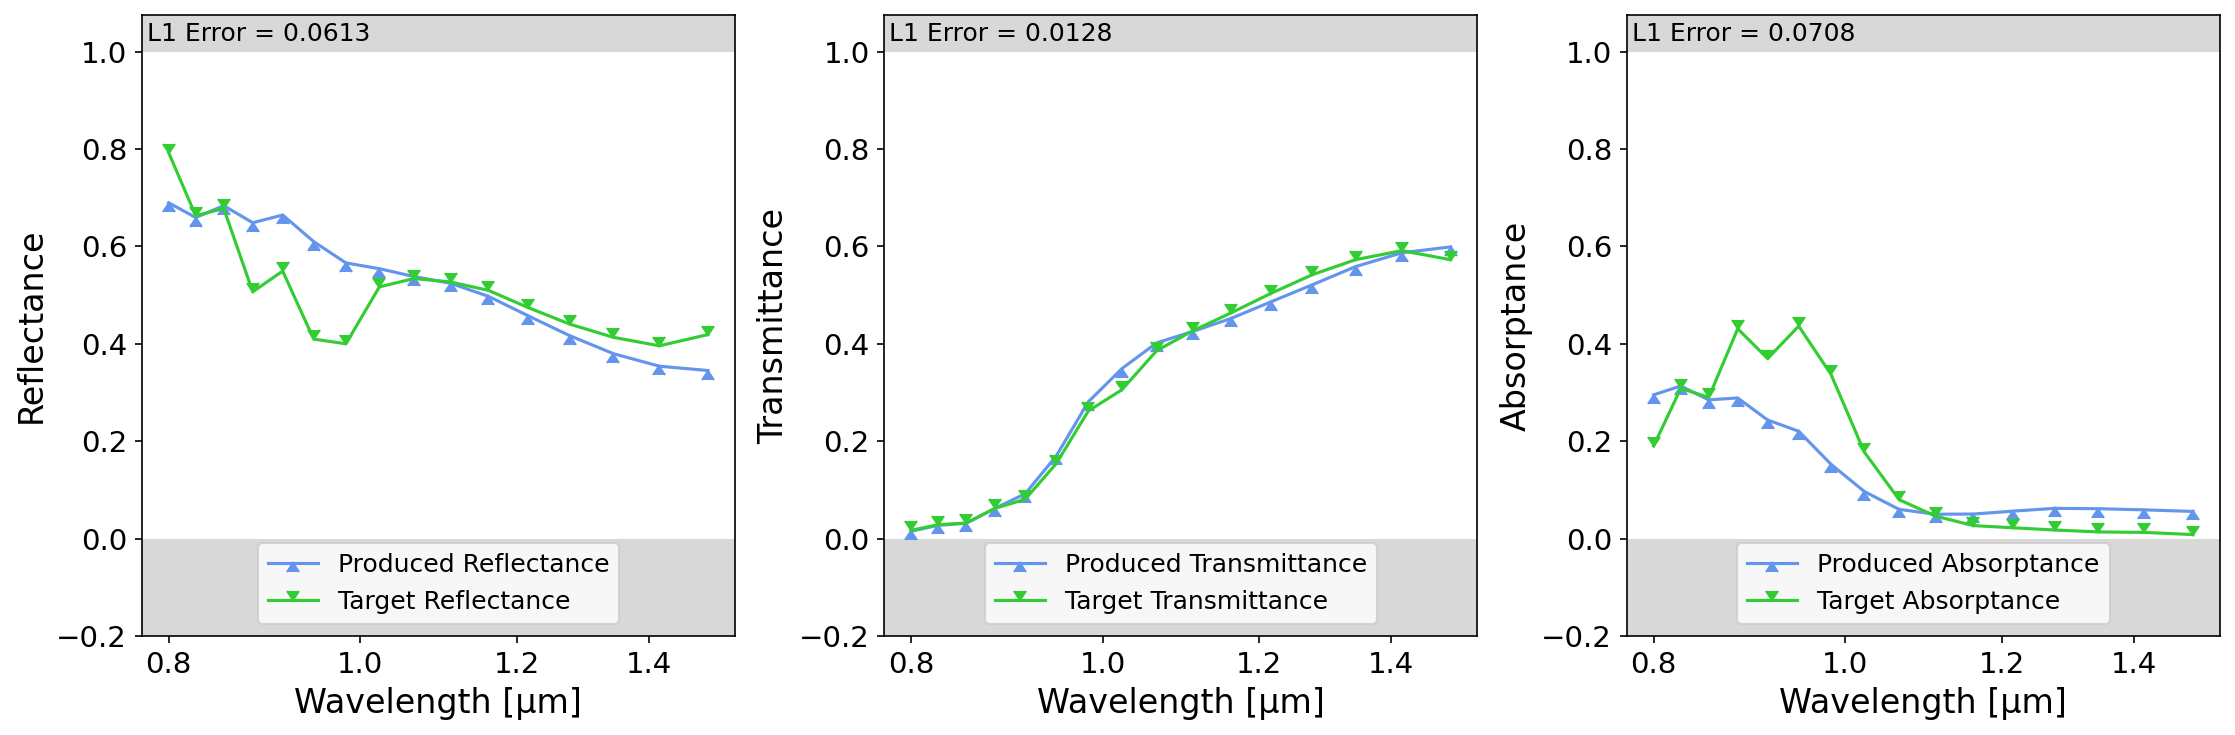

In [10]:
nidn.plot_spectra(cfg)